<a href="https://colab.research.google.com/github/Chittesh23/IBM-assignment-Enron-email-analysis/blob/main/Copy_of_download_enron_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [197]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-28 09:22:57--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-28 09:22:58--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  41.6MB/s    in 25s     

2023-05-28 09:23:24 (32.

In [198]:
#Importing library
import sqlite3



In [199]:
#Connecting data base to libary
conn = sqlite3.connect("enron.db")

In [200]:
cur = conn.cursor()

In [201]:
#Check schema of database
sql = """
SELECT name
FROM sqlite_master
Where type = 'table';
"""
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [202]:
#check schema of table using PRAGMA
sql = """
PRAGMA table_info('employeelist');
"""
cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [203]:
#check schema of table using PRAGMA
sql = """
PRAGMA table_info('message');
"""
cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [204]:
#check schema of table using PRAGMA
sql = """
PRAGMA table_info('recipientinfo');
"""
cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [205]:
#check schema of table using PRAGMA
sql = """
PRAGMA table_info('referenceinfo');
"""
cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [206]:
#using pandas lib to read database
import pandas as pd

sql ='''
SELECT * from employeelist;
'''
#Load the data into a Dataframe 
employees_df = pd.read_sql_query(sql, conn)
employees_df

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
...,...,...,...,...,...,...,...,...,...
144,146,Steven,South,steven.p.south@enron.com,steven.south@enron.com,p..south@enron.com,,south-s,N/A
145,147,Carol,Clair,carol.clair@enron.com,carol.st.clair@enron.com,carol.stclair@enron.com,,stclair-c,Vice President
146,148,Chris,Stokley,chris.stokley@enron.com,,,,stokley-c,N/A
147,149,Kate,Symes,kate.symes@enron.com,ksymes@enron.com,,,symes-k,Employee


In [207]:
#using pandas lib to read database
import pandas as pd

sql ='''
SELECT * from message;
'''
#Load the data into a Dataframe 
message_df = pd.read_sql_query(sql, conn)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [208]:
# Finding how many emails were sent for each year.
import pandas as pd
import sqlite3

conn = sqlite3.connect('enron.db')
message_df.to_sql('emails', conn, if_exists='replace', index=False)

query = '''
SELECT strftime('%Y', date) as year, COUNT(*) as email_count
FROM emails
GROUP BY year
ORDER BY year
'''
result = pd.read_sql_query(query, conn)
print(result)




    year  email_count
0   0001          205
1   0002           53
2   1979            6
3   1997            1
4   1998           85
5   1999         4760
6   2000        68707
7   2001       156320
8   2002        22562
9   2004           53
10  2007            1
11  2020            2
12  2043            1
13  2044            3


In [209]:
#using pandas lib to read database
import pandas as pd

sql6 ='''
SELECT * from Recipientinfo;
'''
#Load the data into a Dataframe 
recipients_df = pd.read_sql_query(sql6, conn)
recipients_df

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
...,...,...,...,...,...
2064437,3242059,404927,BCC,john.anderson@enron.com,None
2064438,3242060,404927,BCC,mark.guzman@enron.com,None
2064439,3242061,404927,BCC,michael.mier@enron.com,None
2064440,3242062,404927,BCC,pete.davis@enron.com,None


In [210]:
#using pandas lib to read database
import pandas as pd

sql5 ='''
SELECT * from Referenceinfo;
'''
#Load the data into a Dataframe 
references_df = pd.read_sql_query(sql5, conn)
references_df

,rfid,mid,reference
0,2,79,"> From: Le Vine, Debi> Sent: Thursday, August ..."
1,3,99,"> From: Golden, Mark> Sent: Thursday, August 2..."
2,8,533,"From: Sole, JeanneSent: Friday, August 18, 200..."
3,13,842,"From: \tGrigsby, Mike Sent:\tThursday, March ..."
4,14,845,"From: Monaco, John [EM] [mailto:john.monaco@ci..."
...,...,...,...
54773,63020,404873,From: \tEnron Announcements/Corp/Enron@ENRON ...
54774,63021,404888,"From: \tBlair, Kit Sent:\tWednesday, November..."
54775,63022,404907,"From: \tDean, Craig Sent:\tThursday, January ..."
54776,63023,404918,"From: \tDean, Craig Sent:\tTuesday, February ..."


In [211]:
#Aggregating Recipientinfo and Referenceinfo

import pandas as pd
import sqlite3


# Create an in-memory SQLite database
conn2 = sqlite3.connect(':memory:')

# Store the dataframes in the database
recipients_df.to_sql('recipientinfo', conn2, index=False)
references_df.to_sql('referenceinfo', conn2, index=False)

# Perform a SQL join to aggregate the data without summing
query = '''
    SELECT recipientinfo.mid,rid,rtype,rvalue,rfid,reference
    FROM recipientinfo
    LEFT JOIN referenceinfo ON recipientinfo.mid = referenceinfo.mid
'''
result = pd.read_sql_query(query, conn)

print(result)


            mid      rid rtype                             rvalue  rfid  \
0            52       67    TO            all.worldwide@enron.com   NaN   
1            53       68    TO             all.downtown@enron.com   NaN   
2            54       69    TO      all.enron-worldwide@enron.com   NaN   
3            55       70    TO            all.worldwide@enron.com   NaN   
4            56       71    TO  all_enron_north.america@enron.com   NaN   
...         ...      ...   ...                                ...   ...   
2064437  404927  3242059   BCC            john.anderson@enron.com   NaN   
2064438  404927  3242060   BCC              mark.guzman@enron.com   NaN   
2064439  404927  3242061   BCC             michael.mier@enron.com   NaN   
2064440  404927  3242062   BCC               pete.davis@enron.com   NaN   
2064441  404927  3242063   BCC             ryan.slinger@enron.com   NaN   

        reference  
0            None  
1            None  
2            None  
3            None  

In [212]:


#Finding out the email sent for each year

import pandas as pd


# Extract the year from each header and create a new column with the extracted years
result['year'] = result['reference'].str.extract(r'(\d{4})')

# Count the occurrences of each year in the 'year' column
year_counts = result['year'].value_counts()

print(year_counts)



2001    215265
2002     34648
2000     15836
1999       861
1975       216
         ...  
4541         1
0000         1
1957         1
2222         1
0301         1
Name: year, Length: 163, dtype: int64


In [213]:
#statistical summary of the data
#Gives info about count of non-null values, mean, standard deviation, minimum and maximum values in each column
message_df.describe()

,mid
count,252759.000000
mean,190260.434980
std,115507.436258
min,52.000000
25%,88564.500000
50%,186421.000000
75%,279961.500000
max,404927.000000


In [214]:
#Check date format.
condition = message_df['date'] 
#filtered_df = message_df[condition]
condition


0         2000-01-21 04:51:00
1         2000-01-24 01:37:00
2         2000-01-24 02:06:00
3         2000-02-02 10:21:00
4         2000-02-07 22:16:00
                 ...         
252754    2002-02-06 16:51:29
252755    2002-02-06 17:17:39
252756    2002-02-06 20:09:37
252757    2002-02-07 04:38:13
252758    2002-02-07 05:38:14
Name: date, Length: 252759, dtype: object

In [215]:
#Checking for null values
sql = """
Select date from message
"""
#convert to dataframe
import pandas as pd
message_df = pd.read_sql_query(sql,conn)
message_df.info()

#sql query to count number of emails per day



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    252759 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


# Interpretation and conclusion


**Main insights**



There were 150 employees working in the company.


The emails received for each year is as follows

*   68707 for 2000
*   156320 for 2001
*   22562 for 2002

The emails sent for each year is as follows

*   15836 for 2000
*   215265 for 2001
*   34648 for 2002

The date format for message is as follows :2000-01-21 04:51:00

There are no null values in the date collumn 


















`




**Limitations**

There is a too large volume of data such as email received in message to be able to perform a critical analysis.

The body of the email received is not displayed completely.

At first my computer was lagging because i had not activated a function where the browser stops running unused cells.

Further information should have been given on folder in Employeelist to perform analysis.

**Improvement**

Perform analysis on only data for a year or couple of months of 2001.

Provide further information on everything.

**Reflection on usability and effectiveness of python notebooks**

The python notebooks are easy to use and offer very intuitive controls. I found the debugger to be very helpful. Everthing was running smoothly and the runtime was not overbearing. It was able to load the entire table and dataframes which is impressive. It would also be helpful if the dataframes and other tables could be more interactive where we could scroll through the emails to view them and make deductions.

# Email traffic overtime

In [216]:
#convert to dataframe
import pandas as pd
message_df = pd.read_sql_query(sql,conn)
message_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    252759 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [217]:
#sql query to count number of emails per day
sql = """

SELECT strftime('%Y/%d',date)
AS date,
COUNT (*) AS count FROM message
GROUP by date

"""
#convert in dataframe
messageperday_df = pd.read_sql_query(sql,conn)
messageperday_df

,date,count
0,0001/30,2
1,0001/18,1
2,0001/24,1
3,0001/01,1
4,0001/06,1
...,...,...
194082,2020/29,1
194083,2043/28,1
194084,2044/02,1
194085,2044/04,1


In [218]:
#sql query to count number of emails per month
sql = """

SELECT strftime ('%Y-%m', date)
AS date,
COUNT(*) AS count FROM message
GROUP by date

"""
#Convert in dataframe
messagepermonth_df = pd.read_sql_query(sql,conn)
messagepermonth_df

,date,count
0,0001-05,2
1,0001-06,1
2,0001-07,1
3,0001-08,1
4,0001-08,1
...,...,...
194082,2020-12,1
194083,2043-12,1
194084,2044-01,1
194085,2044-01,1


In [219]:
#sql query to count number of emails per week
sql = """

SELECT strftime('%Y-%w',date)
AS date,
COUNT (*) AS count FROM message
GROUP BY date

"""
#convert in dataframe
messageperweek_df = pd.read_sql_query(sql,conn)
messageperweek_df

,date,count
0,0001-3,2
1,0001-1,1
2,0001-2,1
3,0001-3,1
4,0001-1,1
...,...,...
194082,2020-2,1
194083,2043-1,1
194084,2044-6,1
194085,2044-1,1


In [220]:
#Importing module matplot.lib to plot graph
import matplotlib.pyplot as plt


In [221]:
#Import module seaborn to plot graph
import seaborn as sns

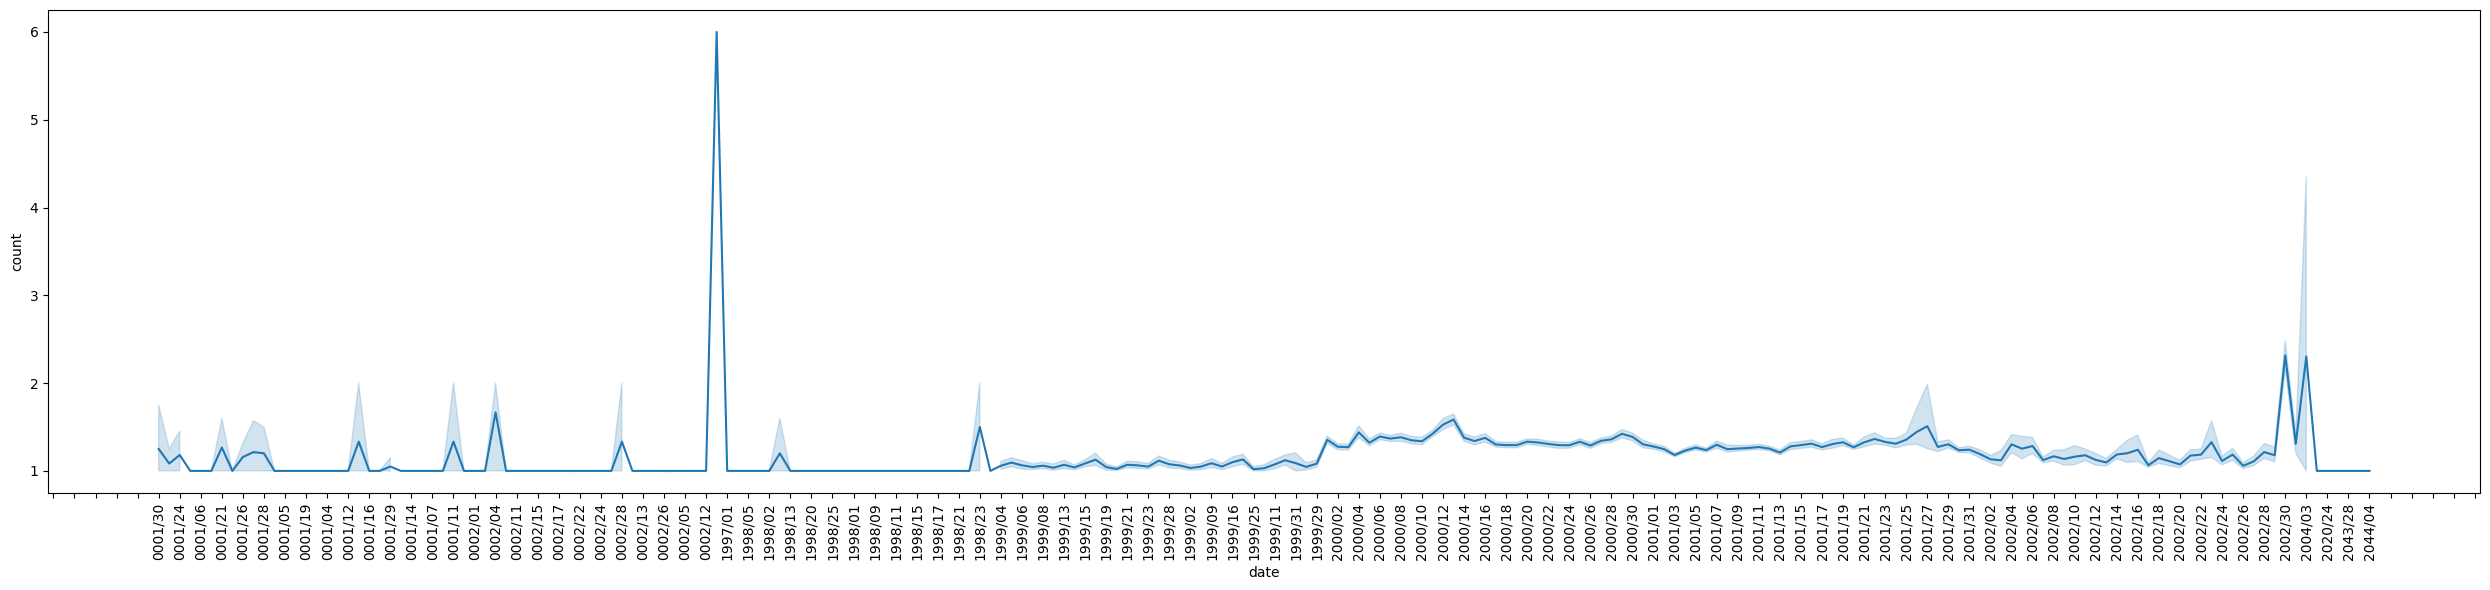

In [229]:
#Codes to display graph for messages per day
import numpy as np
import matplotlib.ticker as ticker
#Creating a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(25,6))

#plot a line graph
sns.lineplot(x = 'date',y = 'count', data = messageperday_df)

#Setting x tickers 
ax.xaxis.set_major_locator(ticker.MaxNLocator(150))

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


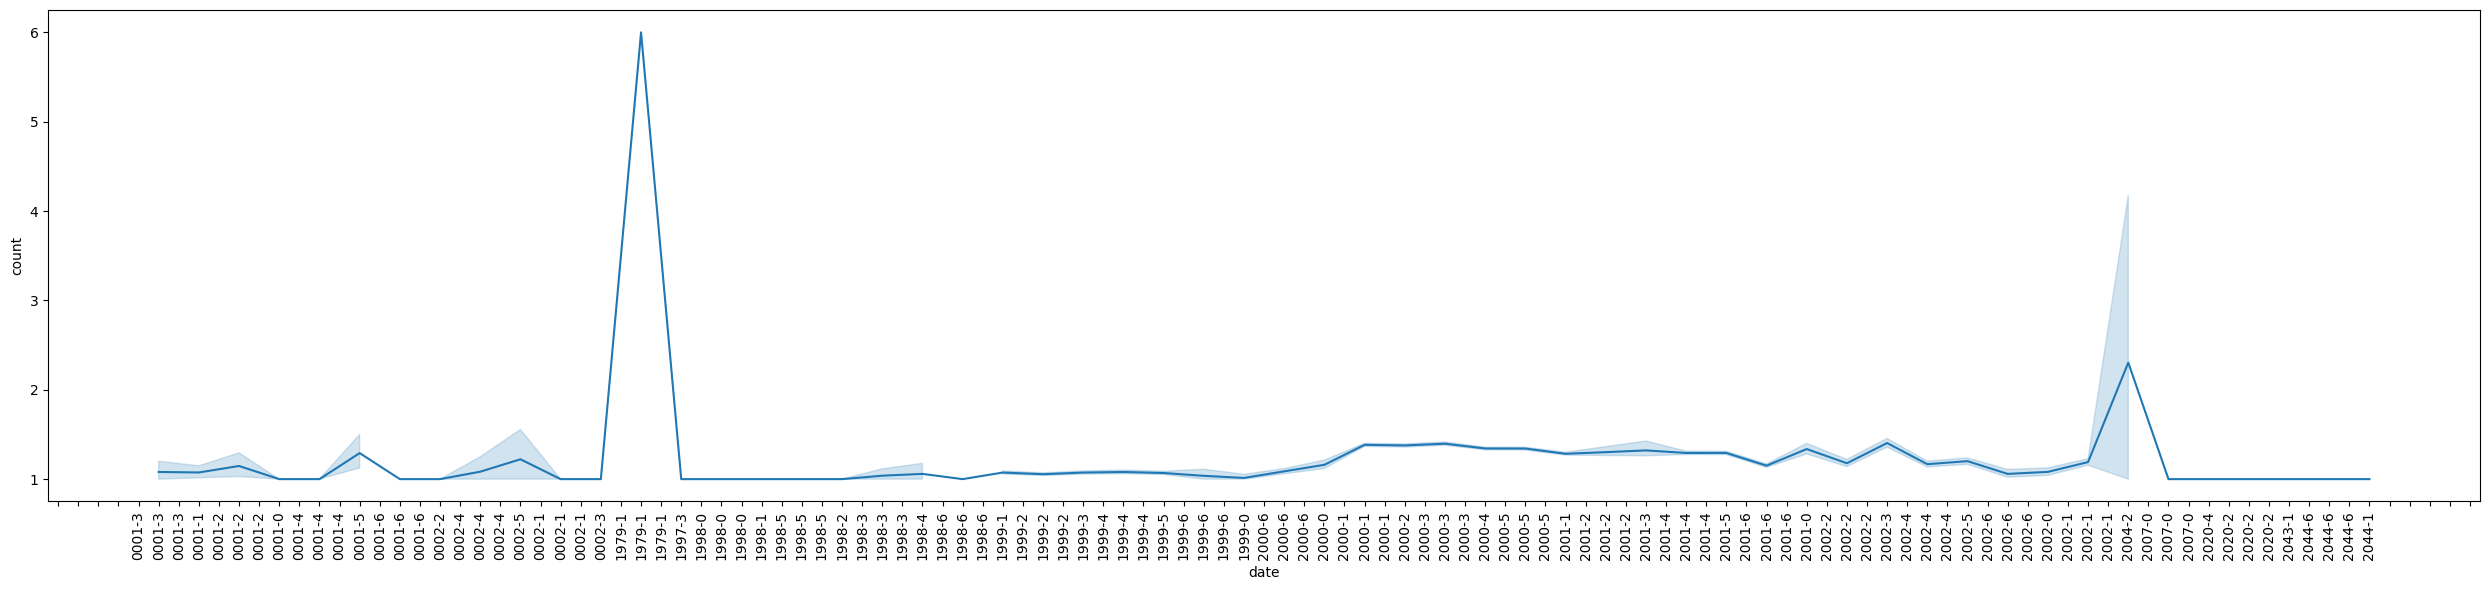

In [231]:
#Plotting garph to display messages received per week
import numpy as np
import matplotlib.ticker as ticker
#Creating a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(25,6))

#plot a line graph
sns.lineplot(x = 'date',y = 'count', data = messageperweek_df)

#Setting x tickers 
ax.xaxis.set_major_locator(ticker.MaxNLocator(150))

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

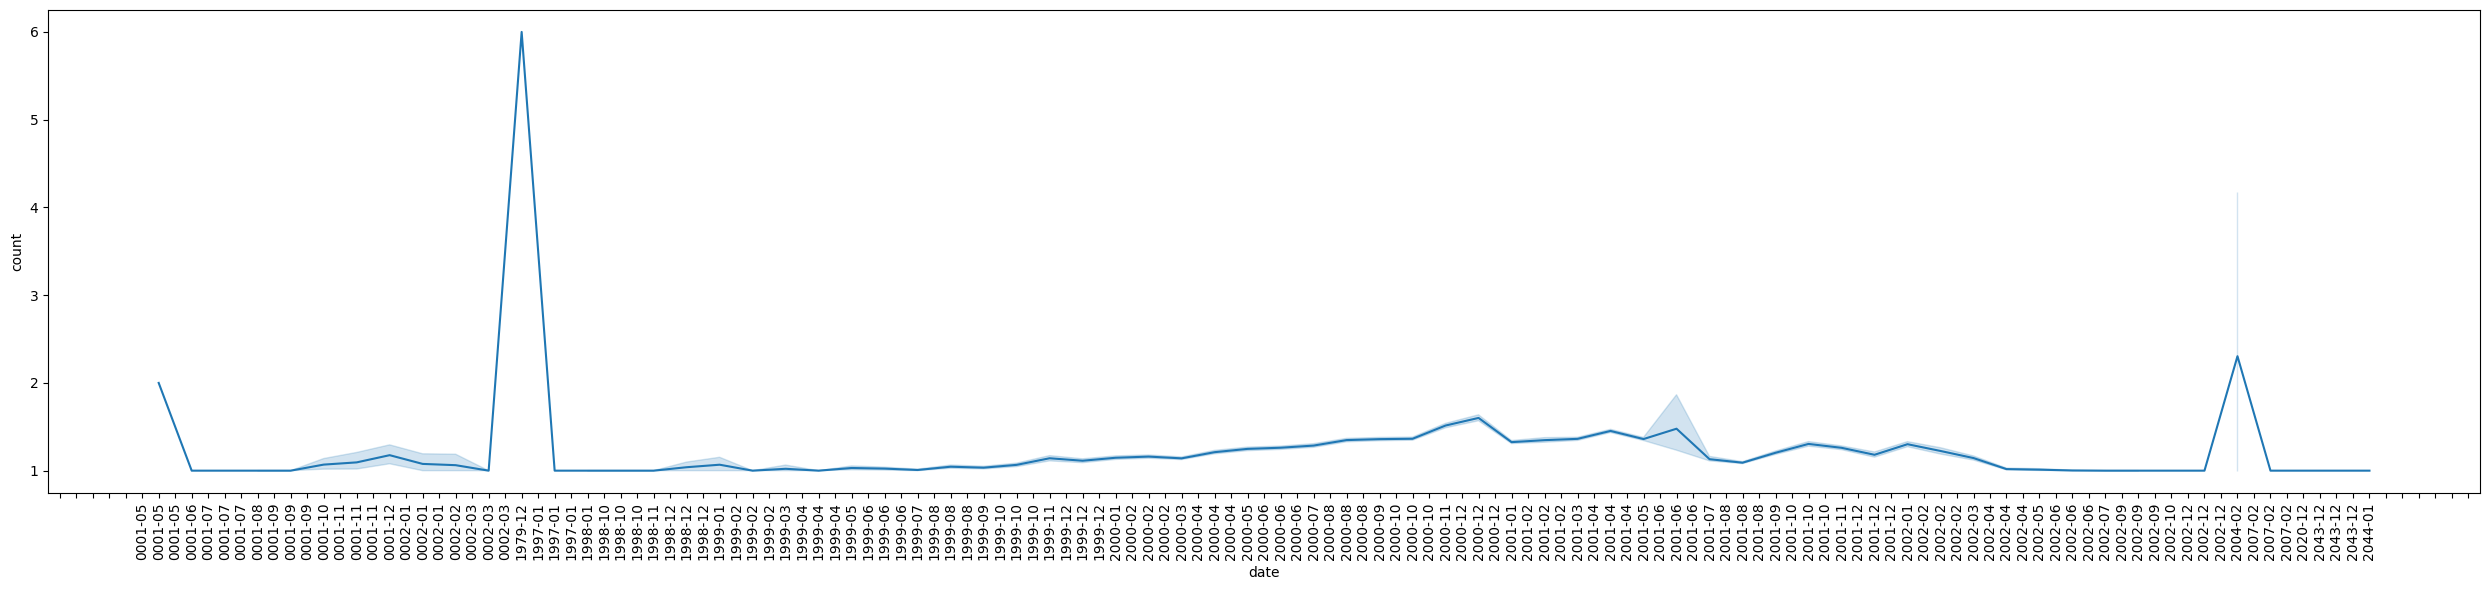

In [230]:


#plotting graph to see emails sent per month
import numpy as np
import matplotlib.ticker as ticker
#Creating a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(25,6))

#plot a line graph
sns.lineplot(x = 'date',y = 'count', data = messagepermonth_df)

#Setting x tickers 
ax.xaxis.set_major_locator(ticker.MaxNLocator(150))

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


**Analysis**

Based on the graph for emails sent per month. There was a peak in emails from 0002-03 to 1997-01 with a count of 6.The emails sent is constant as from 1997-01 to 1999-12 and rises again as from 2000-11 above 1 count to decrease to 1 count. There is a rise in count as from 2002-12 to 2007-02.

#Top senders and recipients



In [232]:
#write sql query to count top sender using count()
sql_sender = """
SELECT sender,COUNT(*)
AS count
FROM message
Group by sender
order by count
desc
Limit 15
"""





In [233]:
#convert data in dataframe

Topsenders_df = pd.read_sql_query(sql_sender,conn)
Topsenders_df

,sender,count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


In [234]:
#display the dataframe
print(Topsenders_df)

                           sender  count
0         jeff.dasovich@enron.com   6273
1            j.kaminski@enron.com   5838
2              kay.mann@enron.com   5100
3       sara.shackleton@enron.com   4797
4            tana.jones@enron.com   4437
5         chris.germany@enron.com   3686
6            no.address@enron.com   3511
7   enron.announcements@enron.com   2838
8       matthew.lenhart@enron.com   2784
9     debra.perlingiere@enron.com   2549
10           pete.davis@enron.com   2500
11        steven.j.kean@enron.com   2278
12         gerald.nemec@enron.com   2275
13      james.d.steffes@enron.com   2161
14        mark.e.taylor@enron.com   2146


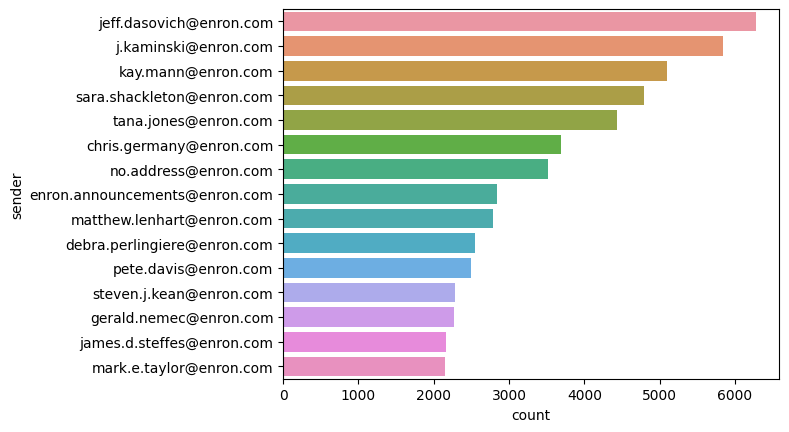

In [235]:
#Using barplot
import matplotlib.pyplot
import seaborn as sns
data = Topsenders_df
sns.barplot(x="count",y="sender",data=data)
plt.show()

In [236]:
#write sql query to count top recipient using count()
sql_recipient = """
SELECT rvalue,COUNT(*)
AS count
FROM Recipientinfo
Group by rvalue
order by count
desc
Limit 15
"""

In [237]:
#convert data in dataframe

Toprecipients_df = pd.read_sql_query(sql_recipient,conn)
Toprecipients_df

,rvalue,count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


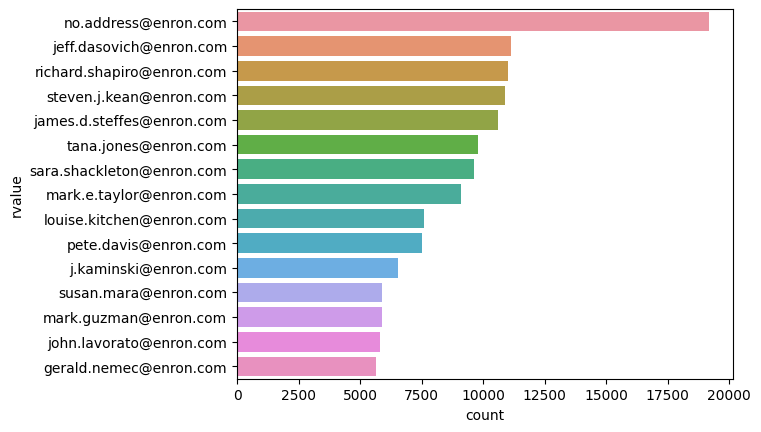

In [238]:
#Using barplot
import matplotlib.pyplot
import seaborn as sns
data2 = Toprecipients_df
sns.barplot(x="count",y="rvalue",data=data2)
plt.show()

# Email Distribution By Recipient Type

In [239]:
#write sql query to categorize by rtype using count
sql_rtype = """
SELECT rtype, COUNT(*) AS count
FROM Recipientinfo
GROUP BY rtype;
"""



In [240]:
#convert data in dataframe
# Execute the query and fetch the results
result = conn.execute(sql_rtype).fetchall()

# Convert the query result into a dataframe
df = pd.DataFrame(result, columns=['rtype', 'count'])

# Close the database connection
conn.close()

# Print the dataframe
print(df)

  rtype    count
0   BCC   253713
1    CC   253735
2    TO  1556994


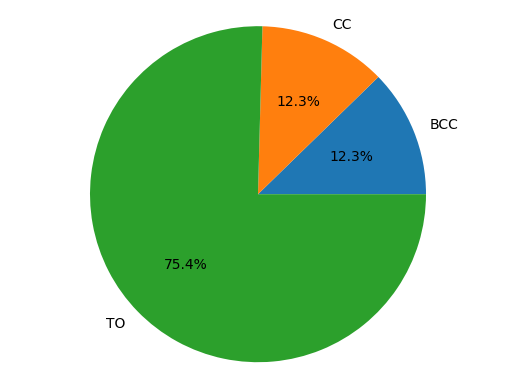

In [241]:

#plot graph using pie() and show()
plt.pie(df['count'], labels=df['rtype'], autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

**Analysis**
